In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [2]:
# Load up file
basic_df = pd.read_parquet('/Volumes/Britt_SSD/ReDoEvals3/comboEval.parquet')
# basic_df["isDBG"] = np.where(basic_df['reward']==50, 1, 0)

In [3]:
# Set up basic numeric DF
basic_num_df = basic_df
basic_num_df = basic_num_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
basic_num_df.drop(columns=["action_name","pacman_direction","red_ghost_direction","pink_ghost_direction","blue_ghost_direction","orange_ghost_direction","agent"], inplace=True)
print(basic_num_df.dtypes[basic_num_df.dtypes != 'int64'][basic_num_df.dtypes != 'float64'])

Series([], dtype: object)


In [4]:
agent_names = basic_df.agent.unique()
agent_names

array(['PowerPill_700k', 'PowerPill_23M', 'FearGhosts_2M',
       'FearGhosts_18M', 'Dots_3M', 'Dots_21M', 'Standard_300k',
       'Standard_2M', 'Standard_23_run1', 'Standard_23_run2'],
      dtype=object)

In [5]:
for index, agent in enumerate(basic_df.agentNum.unique()):
    temp = basic_df[basic_df['agentNum']==index]
    print(agent_names[index])
    print(temp.dbgNum.unique())
    print(temp.isDBG.unique())

PowerPill_700k


AttributeError: 'DataFrame' object has no attribute 'dbgNum'

In [ ]:
basic_df.columns[40:83]

In [ ]:
# import plotly.figure_factory as ff
# # Just use key states as-is firs, see if it works
# for agent_index, num in enumerate(basic_num_df.agentNum.unique()):
#     temp1 = basic_num_df[basic_num_df['agentNum']==num]
#     for key_index, key in enumerate(temp1.keyNum.unique()):
#         temp2 = temp1[temp1['keyNum']==key]
#         if (key_index >= 1):
#             upper_bound = len(temp2)*5
#             plt.figure(figsize=(3.2, 5))
#             x_loc = range(1,upper_bound+1)[1::5]
#             x_loc2 = range(2,upper_bound+2)[2::5]
#             x_loc3 = range(3,upper_bound+3)[3::5]
#             x_loc4 = range(4,upper_bound+4)[4::5]

#             x_loc5 = range(4,upper_bound+4)[0::5]
#             x_loc6 = range(6,upper_bound+6)[1::5]

# #             headaxislength_val = 0.5
# #             headlength_val = 0.5
# #             minlength_val = 0.01
# #             height_addtion = -1
# #             ls = ":"
# #             scale_val = 95
# #             scale_units_val = "inches"
# #             width_val = 0.07

#             headaxislength_val = 1
#             headlength_val = 1
    
#             minlength_val = 0.01
#             height_addtion = 0
#             ls = ":"
#             scale_val = 50
#             scale_units_val = 'inches'
#             width_val = 5

#             if (temp2["isDBG"].any() > 0):
#                 print("BLUE GHOST")
#                 sns.set_style("darkgrid")

#                 plt.gca().set_ylim((0,75))
#                 plt.gca().xaxis.grid(True)
                
#                 plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.6, c="b")

#                 plt.quiver(x_loc,abs(temp2["to_db1"])+height_addtion,0,temp2["diff_to_dbg1"],
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val, 
#                            headlength=headlength_val)
#                 plt.quiver(x_loc2,abs(temp2["to_db2"])+height_addtion,0,temp2["diff_to_dbg2"], 
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val,
#                           headlength=headlength_val)
#                 plt.quiver(x_loc3,abs(temp2["to_db3"])+height_addtion,0,temp2["diff_to_dbg3"], 
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val,
#                           headlength=headlength_val)
#                 plt.quiver(x_loc4,abs(temp2["to_db4"])+height_addtion,0,temp2["diff_to_dbg4"], 
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val,
#                           headlength=headlength_val)

# #                 plt.scatter(x_loc5,temp2["beforeLifeLoss"], c = temp2["beforeLifeLoss"])
#                 plt.scatter(x_loc6,temp2["bigRewardNum"], c = temp2["bigRewardNum"], label="ate ghost")
#                 plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))

# #                 plt.title(str(agent_names[agent_index] + " Key " + str(temp2.keyNum.unique())))
#                 plt.title("Dark Blue Ghosts in Key " + str(temp2.keyNum.unique()))
# #                 plt.savefig("/Users/byrdsmyth/Documents/School/Classes/CPTS575/Project/codebase/" + agent_names[list_index] + "Key" + str(df.keyNum.unique()) + ".png")
#                 plt.show()

#             else:
#                 sns.set_style("whitegrid")
#                 plt.gca().set_ylim((0,50))
#                 plt.gca().xaxis.grid(True)
#                 plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.6)

#                 plt.quiver(x_loc,abs(temp2["to_red_ghost"])+height_addtion,0,temp2["diff_to_red"], 
#                             color="r", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)
#                 plt.quiver(x_loc2,abs(temp2["to_blue_ghost"])+height_addtion,0,temp2["diff_to_blue"], 
#                             color="b", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)
#                 plt.quiver(x_loc3,abs(temp2["to_orange_ghost"])+height_addtion,0,temp2["diff_to_orange"], 
#                             color="darkorange", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)
#                 plt.quiver(x_loc4,abs(temp2["to_pink_ghost"])+height_addtion,0,temp2["diff_to_pink"], 
#                             color="pink", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)

#                 plt.scatter(x_loc,temp2["beforeLifeLoss"], c = temp2["beforeLifeLoss"], label="lost life")
#                 plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))
# #                 plt.scatter(x_loc,temp2["bigRewardNum"], c = temp2["bigRewardNum"])

# #                 plt.title(str(agent_names[agent_index] + " Key " + str(temp2.keyNum.unique())))
#                 plt.title("Ghost Moves in Key " + str(temp2.keyNum.unique()))
# #                 plt.savefig("/Users/byrdsmyth/Documents/School/Classes/CPTS575/Project/codebase/" + agent_names[list_index] + "ARROWSKey" + str(df.keyNum.unique()) + ".png")
#                 plt.show()

In [ ]:
# # try creating a new df for each key state which averages chunks of movement in each key state
# # 'PP700', 'Std2', 'fear2', 'Nml3', 'Nml21'

# pp700Key_DF = []
# Std2Key_DF = []
# fear2Key_DF = []
# Nml3Key_DF = []
# Nml21Key_DF = []

# avgKeyDF_List = [pp700Key_DF, Std2Key_DF, 
#                  fear2Key_DF, Nml3Key_DF, Nml21Key_DF]

# for index, agent in enumerate(basic_num_df.agentNum.unique()):
#     temp = basic_num_df[basic_num_df['agentNum']==index]
#     temp2 = temp[temp["isKeyOrContext"]>0]
    
#     for key_index, key in enumerate(temp2.keyNum.unique()):
#         if key > 0:
#             temp3 = temp2[temp2['keyNum']==key_index]
#             temp4 = temp3.groupby(np.arange(len(temp3))//10).mean()
#             print("Key: " + str(key))

#             avgKeyDF_List[index].append(temp4)

In [ ]:
# import plotly.figure_factory as ff

# for list_index, list_name in enumerate(avgKeyDF_List):
# #     fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1, ncols=5,sharey=True, figsize=(15,15))
# #     axes = [ax1,ax2,ax3,ax4,ax5]
# #     for ax in axes:
#     for df_index, df in enumerate(list_name):
#         if (df_index >= 0):
#             upper_bound = len(df)*5
#             plt.figure(figsize=(3.2, 5))
#             x_loc = range(1,upper_bound+1)[1::5]
#             x_loc2 = range(2,upper_bound+2)[2::5]
#             x_loc3 = range(3,upper_bound+3)[3::5]
#             x_loc4 = range(4,upper_bound+4)[4::5]

#             x_loc5 = range(4,upper_bound+4)[0::5]
#             x_loc6 = range(6,upper_bound+6)[1::5]

#             arrow_width_factor = 1000
#             height_addtion = 0
#             length_factor = 3
#             ls = ":"

#             if (df["isDBG"].any() > 0):
#                 print("BLUE GHOST")
#                 plt.gca().set_ylim((0,100))
#                 plt.gca().xaxis.grid(True)
#                 plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.6)

#                 plt.quiver(x_loc,abs(df["to_db1"])+height_addtion,0,df["diff_to_dbg1"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_dbg1"])), color="darkblue", data = df,
#                           minlength = length_factor, linestyle = ls)
#                 plt.quiver(x_loc2,abs(df["to_db2"])+height_addtion,0,df["diff_to_dbg2"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_dbg2"])), color="darkblue", data = df,
#                           minlength = length_factor, linestyle = ls)
#                 plt.quiver(x_loc3,abs(df["to_db3"])+height_addtion,0,df["diff_to_dbg3"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_dbg4"])), color="darkblue", data = df,
#                           minlength = length_factor, linestyle = ls)
#                 plt.quiver(x_loc4,abs(df["to_db4"])+height_addtion,0,df["diff_to_dbg4"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_dbg4"])), color="darkblue", data = df,
#                           minlength = length_factor, linestyle = ls)

#                 plt.scatter(x_loc5,df["beforeLifeLoss"], c = df["beforeLifeLoss"])
#                 plt.scatter(x_loc6,df["bigRewardNum"], c = df["bigRewardNum"])

#                 plt.title(str(agent_names[list_index] + " Key " + str(df.keyNum.unique())))
#                 plt.savefig("/Users/byrdsmyth/Documents/School/Classes/CPTS575/Project/codebase/" + agent_names[list_index] + "Key" + str(df.keyNum.unique()) + ".png")
#                 plt.show()

#             else:
#                 plt.gca().set_ylim((0,100))
#                 plt.gca().xaxis.grid(True)
#                 plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.6)

#                 plt.quiver(x_loc,abs(df["to_red_ghost"])+height_addtion,0,df["diff_to_red"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_red"])), color="r", data = df,
#                           minlength = length_factor)
#                 plt.quiver(x_loc2,abs(df["to_blue_ghost"])+height_addtion,0,df["diff_to_blue"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_blue"])), color="b", data = df,
#                           minlength = length_factor)
#                 plt.quiver(x_loc3,abs(df["to_orange_ghost"])+height_addtion,0,df["diff_to_orange"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_orange"])), color="darkorange", data = df,
#                           minlength = length_factor)
#                 plt.quiver(x_loc4,abs(df["to_pink_ghost"])+height_addtion,0,df["diff_to_pink"], 
#                            linewidth = arrow_width_factor*(1/abs(df["diff_to_pink"])), color="pink", data = df,
#                           minlength = length_factor)

#                 plt.scatter(x_loc,df["beforeLifeLoss"], c = df["beforeLifeLoss"])
#                 plt.scatter(x_loc,df["bigRewardNum"], c = df["bigRewardNum"])

#                 plt.title(str(agent_names[list_index] + " Key " + str(df_index)))
#                 plt.savefig("/Users/byrdsmyth/Documents/School/Classes/CPTS575/Project/codebase/" + agent_names[list_index] + "ARROWSKey" + str(df.keyNum.unique()) + ".png")
#                 plt.show()


In [ ]:
# import plotly.figure_factory as ff

# for agent_index, dfs in enumerate(avgKeyDF_List):
#     for key_index, key in enumerate(dfs):
#         temp2 = key
#         if (key_index >= 1):
#             upper_bound = len(temp2)*5
#             plt.figure(figsize=(3.2, 5))
#             x_loc = range(1,upper_bound+1)[1::5]
#             x_loc2 = range(2,upper_bound+2)[2::5]
#             x_loc3 = range(3,upper_bound+3)[3::5]
#             x_loc4 = range(4,upper_bound+4)[4::5]

#             x_loc5 = range(4,upper_bound+4)[0::5]
#             x_loc6 = range(6,upper_bound+6)[1::5]

#             headaxislength_val = 0.75
#             headlength_val = 0.75
#             minlength_val = 0.01
#             height_addtion = 1
#             ls = ":"
#             scale_val = 18
#             scale_units_val = "inches"
#             width_val = 0.02

#             if (temp2["isDBG"].any() > 0):
#                 print("BLUE GHOST")
#                 sns.set_style("darkgrid")

#                 plt.gca().set_ylim((0,75))
#                 plt.gca().xaxis.grid(True)
                
#                 plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.6, c="b")

#                 plt.quiver(temp2["Unnamed: 0"],abs(temp2["to_db1"])+height_addtion,0,temp2["diff_to_dbg1"],
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val, 
#                            headlength=headlength_val)
#                 plt.quiver(temp2["Unnamed: 0"]+1,abs(temp2["to_db2"])+height_addtion,0,temp2["diff_to_dbg2"], 
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val,
#                           headlength=headlength_val)
#                 plt.quiver(temp2["Unnamed: 0"]+2,abs(temp2["to_db3"])+height_addtion,0,temp2["diff_to_dbg3"], 
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val,
#                           headlength=headlength_val)
#                 plt.quiver(temp2["Unnamed: 0"]+3,abs(temp2["to_db4"])+height_addtion,0,temp2["diff_to_dbg4"], 
#                            color="darkblue", linestyle = ls, scale=scale_val, scale_units=scale_units_val, 
#                            width=width_val, minlength=minlength_val, headaxislength=headaxislength_val,
#                           headlength=headlength_val)

# #                 plt.scatter(x_loc5,temp2["beforeLifeLoss"], c = temp2["beforeLifeLoss"])
#                 temp3 = temp2[temp2['bigRewardNum']==0]
#                 temp4 = temp2[temp2['bigRewardNum']!=0]
#                 plt.scatter(temp3['state'],temp3["bigRewardNum"], c = 'slategrey', label="")
#                 plt.scatter(temp4['state'],temp4["bigRewardNum"], c = 'gold', label="Ate Ghost")
#                 plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2))

# #                 plt.title(str(agent_names[agent_index] + " Key " + str(temp2.keyNum.unique())))
#                 plt.title("Dark Blue Ghosts in Key " + str(temp2.keyNum.unique()))
# #                 plt.savefig("/Users/byrdsmyth/Documents/School/Classes/CPTS575/Project/codebase/" + agent_names[list_index] + "Key" + str(key_index) + ".png")
#                 plt.show()

#             else:
#                 sns.set_style("whitegrid")
# #                 plt.gca().set_ylim((0,50))
#                 plt.gca().xaxis.grid(True)
#                 plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.6)

#                 plt.quiver(temp2["Unnamed: 0"],abs(temp2["to_red_ghost"])+height_addtion,0,temp2["diff_to_red"], 
#                             color="red", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)
#                 plt.quiver(temp2["Unnamed: 0"]+1,abs(temp2["to_blue_ghost"])+height_addtion,0,temp2["diff_to_blue"], 
#                             color="dodgerblue", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)
#                 plt.quiver(temp2["Unnamed: 0"]+2,abs(temp2["to_orange_ghost"])+height_addtion,0,temp2["diff_to_orange"], 
#                             color="darkorange", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)
#                 plt.quiver(temp2["Unnamed: 0"]+3,abs(temp2["to_pink_ghost"])+height_addtion,0,temp2["diff_to_pink"], 
#                             color="fuchsia", scale=scale_val, scale_units=scale_units_val, width=width_val,
#                             minlength=minlength_val, headaxislength=headaxislength_val,
#                             headlength=headlength_val)

#                 temp3 = temp2[temp2['beforeLifeLoss']==0]
#                 temp4 = temp2[temp2['beforeLifeLoss']!=0]
#                 plt.scatter(temp3['state'],temp3["beforeLifeLoss"], c = 'slategrey', label="")
#                 plt.scatter(temp4['state'],temp4["beforeLifeLoss"], c = 'gold', label="Lost Life")
#                 plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2))
# #                 plt.scatter(x_loc,temp2["bigRewardNum"], c = temp2["bigRewardNum"])

# #                 plt.title(str(agent_names[agent_index] + " Key " + str(temp2.keyNum.unique())))
#                 plt.title("Ghost Moves in Key " + str(temp2.keyNum.unique()))
# #                 plt.savefig("/Users/byrdsmyth/Documents/School/Classes/CPTS575/Project/codebase/" + agent_names[list_index] + "ARROWSKey" + str(key_index) + ".png")
#                 plt.show()




PowerPill_700k
KEY: 0.0
KEY: 1.0
3     10.0
4      0.0
5      0.0
6     10.0
7      0.0
8      0.0
9      0.0
10    10.0
11     0.0
12     0.0
13    10.0
14     0.0
15     0.0
16     0.0
17    10.0
18     0.0
Name: reward, dtype: float64
Key is 16 steps long
reward:
5.0
reward:
2.5
reward:
2.5
reward:
2.5
KEY: 2.0
1269    0.0
1270    0.0
1271    0.0
1272    0.0
1273    0.0
1274    0.0
1275    0.0
1276    0.0
1277    0.0
1278    0.0
1279    0.0
1280    0.0
1281    0.0
1282    0.0
1283    0.0
1284    0.0
1285    0.0
1286    0.0
1287    0.0
1288    0.0
1289    0.0
1290    0.0
1291    0.0
1292    0.0
1293    0.0
1294    0.0
1295    0.0
1296    0.0
1297    0.0
1298    0.0
1299    0.0
Name: reward, dtype: float64
Key is 31 steps long
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
KEY: 3.0
5776     0.0
5777     0.0
5778     0.0
5779     0.0
5780     0.0
5781     0.0
5782     0.0
5783     0.0
5784     0.0
5785     0.0
5786    10.0
5787     0.0
5788     0.0
5789    10.0
5790     0.

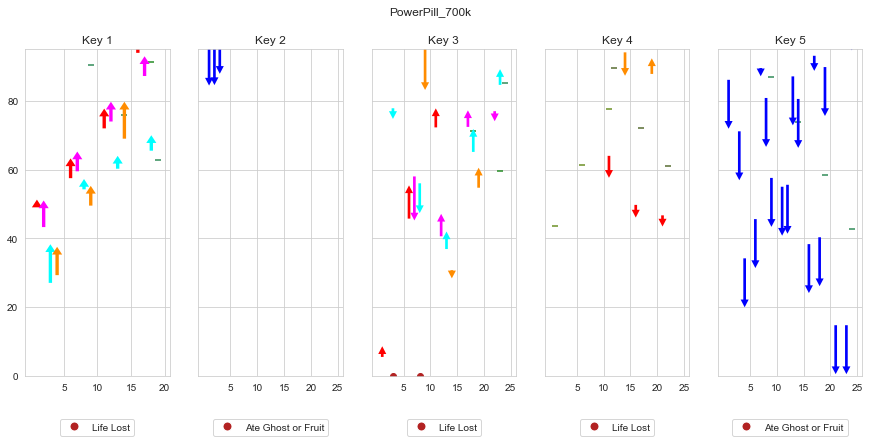

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

PowerPill_23M
KEY: 0.0
KEY: 1.0
12026    200.0
12027      0.0
12028      0.0
12029      0.0
12030      0.0
12031     10.0
12032      0.0
12033      0.0
12034     10.0
12035      0.0
12036      0.0
12037      0.0
12038     10.0
12039      0.0
12040      0.0
12041      0.0
12042     10.0
12043      0.0
12044      0.0
12045     10.0
12046      0.0
12047      0.0
12048      0.0
12049     10.0
12050      0.0
12051      0.0
12052     10.0
12053      0.0
12054      0.0
12055      0.0
12056     10.0
Name: reward, dtype: float64
Key is 31 steps long
reward: 30.0
reward: 2.857142857142857
reward: 2.857142857142857
reward: 2.857142857142857
reward: 3.3333333333333335
KEY: 2.0
12316     0.0
12317     0.0
12318     0.0
12319     0.0
12320     0.0
12321     0.0
12322     0.0
12323     0.0
12324     0.0
12325     0.0
12326     0.0
12327     0.0
12328    10.0
12329     0.0
12330     0.0
12331     0.0
12332    10.0
12333     0.0
12334     0.0
12335    10.0
12336     0.0
12337     0.0
12338    10.0
1233

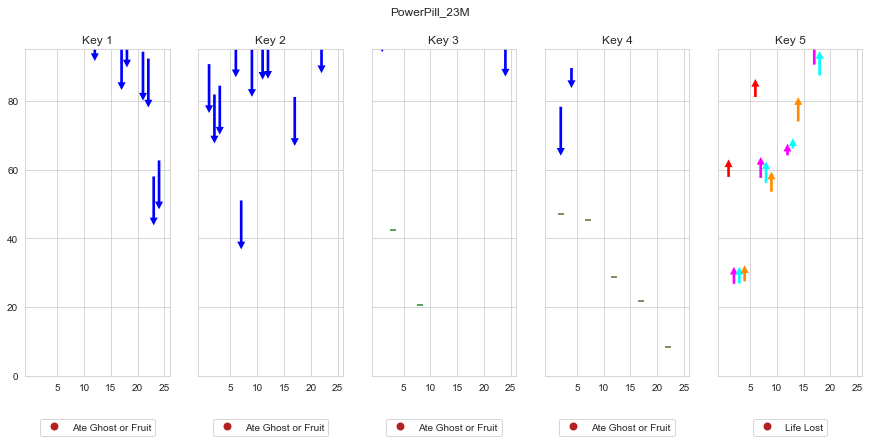

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

FearGhosts_2M
KEY: 0.0
KEY: 1.0
22099     0.0
22100     0.0
22101    10.0
22102     0.0
22103     0.0
22104     0.0
22105    10.0
22106     0.0
22107    10.0
22108     0.0
22109     0.0
22110     0.0
22111    10.0
22112     0.0
22113     0.0
22114    10.0
22115     0.0
22116     0.0
22117     0.0
22118     0.0
22119    10.0
22120     0.0
22121     0.0
22122    10.0
22123     0.0
22124     0.0
22125    10.0
22126     0.0
22127     0.0
22128     0.0
22129    10.0
Name: reward, dtype: float64
Key is 31 steps long
reward: 2.857142857142857
reward: 2.857142857142857
reward: 2.857142857142857
reward: 2.857142857142857
reward: 3.3333333333333335
KEY: 2.0
22964    10.0
22965     0.0
22966     0.0
22967     0.0
22968    10.0
22969     0.0
22970     0.0
22971     0.0
22972    10.0
22973     0.0
22974     0.0
22975     0.0
22976     0.0
22977     0.0
22978     0.0
22979     0.0
22980     0.0
22981     0.0
22982     0.0
22983     0.0
22984     0.0
22985     0.0
22986     0.0
22987     0.0
22988   

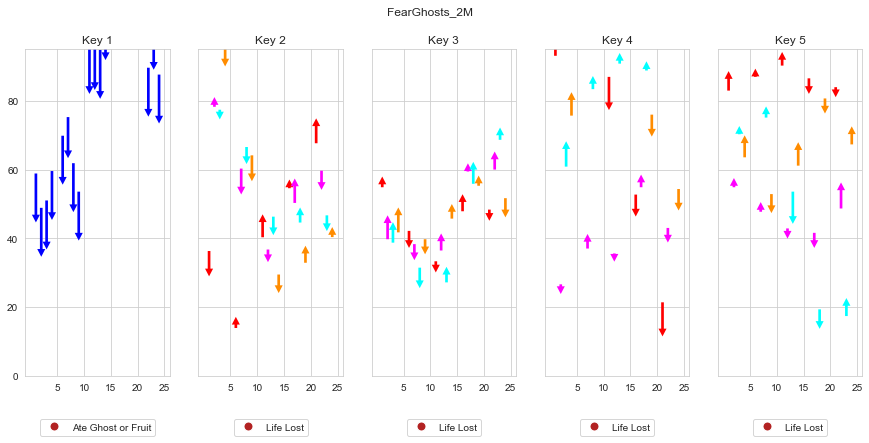

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

FearGhosts_18M
KEY: 0.0
KEY: 1.0
30362    10.0
30363     0.0
30364     0.0
30365    10.0
30366     0.0
30367     0.0
30368     0.0
30369     0.0
30370     0.0
30371     0.0
30372     0.0
30373     0.0
30374     0.0
30375     0.0
30376     0.0
30377    10.0
30378     0.0
30379     0.0
30380    10.0
30381     0.0
30382     0.0
30383    10.0
30384     0.0
30385     0.0
30386     0.0
30387     0.0
30388    10.0
30389     0.0
30390     0.0
30391     0.0
30392     0.0
Name: reward, dtype: float64
Key is 31 steps long
reward:
2.857142857142857
reward:
0.0
reward:
2.857142857142857
reward:
2.857142857142857
reward:
0.0
KEY: 2.0
33352    10.0
33353     0.0
33354     0.0
33355     0.0
33356     0.0
33357     0.0
33358     0.0
33359     0.0
33360     0.0
33361     0.0
33362     0.0
33363     0.0
33364    10.0
33365     0.0
33366     0.0
33367     0.0
33368    10.0
33369     0.0
33370     0.0
33371    10.0
33372     0.0
33373     0.0
33374     0.0
33375    10.0
33376     0.0
33377     0.0
33378   

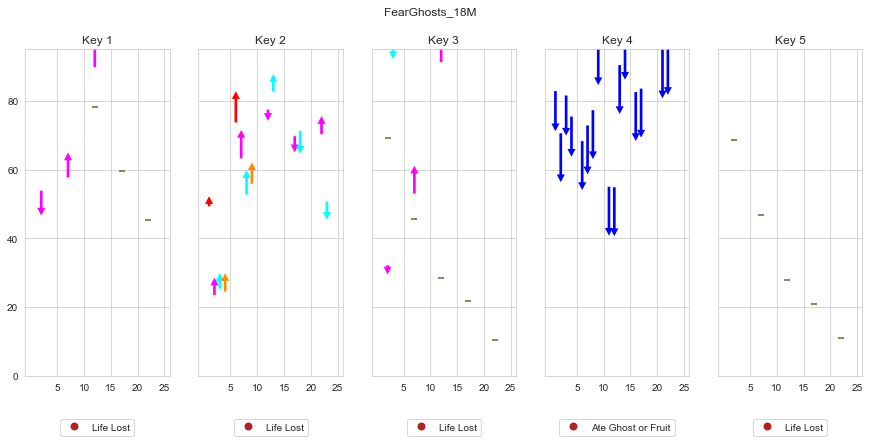

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

Dots_3M
KEY: 0.0
KEY: 1.0
43038     0.0
43039     0.0
43040     0.0
43041     0.0
43042     0.0
43043     0.0
43044     0.0
43045     0.0
43046     0.0
43047     0.0
43048     0.0
43049     0.0
43050     0.0
43051     0.0
43052    10.0
43053     0.0
43054     0.0
43055     0.0
43056    10.0
43057     0.0
43058     0.0
43059     0.0
43060     0.0
43061     0.0
43062     0.0
43063     0.0
43064     0.0
43065     0.0
43066     0.0
43067     0.0
43068     0.0
Name: reward, dtype: float64
Key is 31 steps long
reward:
0.0
reward:
0.0
reward:
2.857142857142857
reward:
0.0
reward:
0.0
KEY: 2.0
43584     0.0
43585     0.0
43586    10.0
43587     0.0
43588     0.0
43589    10.0
43590     0.0
43591     0.0
43592     0.0
43593     0.0
43594     0.0
43595     0.0
43596     0.0
43597     0.0
43598     0.0
43599    10.0
43600     0.0
43601     0.0
43602     0.0
43603    10.0
43604     0.0
43605     0.0
43606     0.0
43607    10.0
43608     0.0
43609     0.0
43610    10.0
43611     0.0
43612     0.0
4

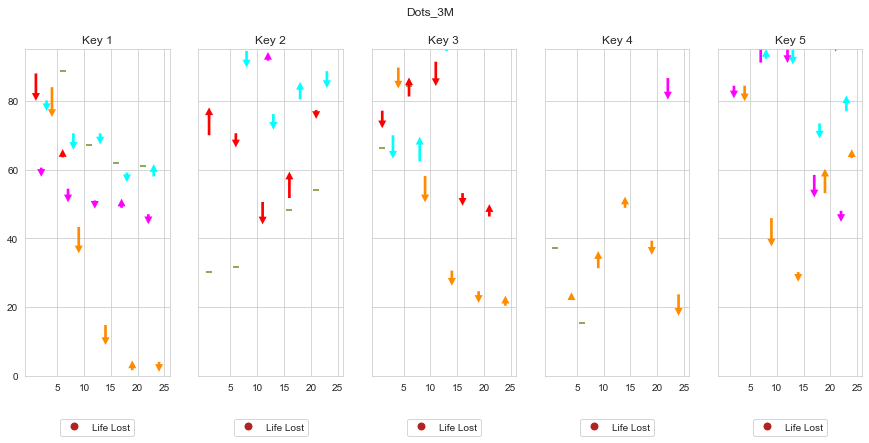

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

Dots_21M
KEY: 0.0
KEY: 1.0
53327     0.0
53328     0.0
53329    10.0
53330     0.0
53331     0.0
53332     0.0
53333     0.0
53334     0.0
53335     0.0
53336     0.0
53337     0.0
53338     0.0
53339     0.0
53340     0.0
53341     0.0
53342    10.0
53343     0.0
53344     0.0
53345    10.0
53346     0.0
53347     0.0
53348    10.0
53349     0.0
53350     0.0
53351    10.0
53352     0.0
53353     0.0
53354     0.0
53355    10.0
53356     0.0
53357     0.0
Name: reward, dtype: float64
Key is 31 steps long
reward: 1.4285714285714286
reward: 0.0
reward: 2.857142857142857
reward: 2.857142857142857
reward: 3.3333333333333335
KEY: 2.0
54083      0.0
54084      0.0
54085     10.0
54086      0.0
54087      0.0
54088     10.0
54089      0.0
54090      0.0
54091      0.0
54092     10.0
54093      0.0
54094      0.0
54095      0.0
54096      0.0
54097      0.0
54098     10.0
54099      0.0
54100      0.0
54101      0.0
54102     10.0
54103      0.0
54104    400.0
54105      0.0
54106      0.0
54

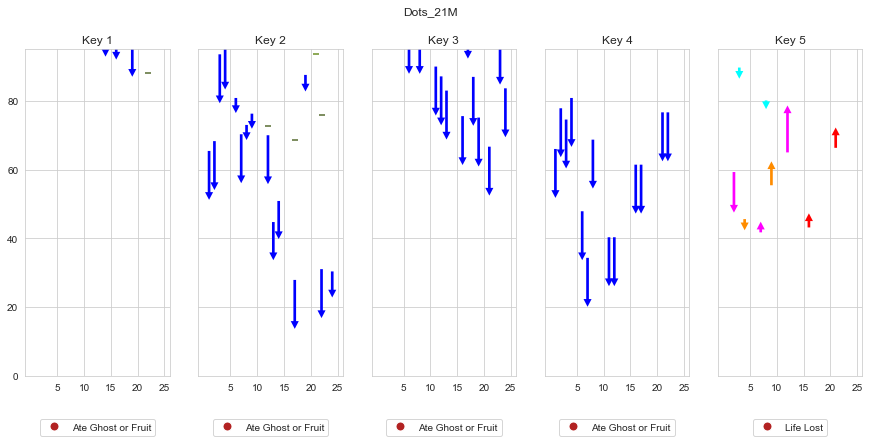

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

Standard_300k
KEY: 0.0
KEY: 1.0
60686     0.0
60687     0.0
60688     0.0
60689     0.0
60690     0.0
60691     0.0
60692     0.0
60693     0.0
60694     0.0
60695     0.0
60696     0.0
60697     0.0
60698    10.0
60699     0.0
60700     0.0
60701    10.0
60702     0.0
60703     0.0
60704    10.0
60705     0.0
60706     0.0
60707     0.0
60708    10.0
60709     0.0
60710     0.0
60711    10.0
60712     0.0
60713     0.0
60714    10.0
60715     0.0
60716     0.0
Name: reward, dtype: float64
Key is 31 steps long
reward:
2.857142857142857
reward:
2.857142857142857
reward:
3.3333333333333335
KEY: 2.0
61020     0.0
61021     0.0
61022     0.0
61023     0.0
61024     0.0
61025     0.0
61026    10.0
61027     0.0
61028     0.0
61029     0.0
61030    10.0
61031     0.0
61032     0.0
61033    10.0
61034     0.0
61035     0.0
61036    10.0
61037     0.0
61038     0.0
61039    10.0
61040     0.0
61041     0.0
61042     0.0
61043     0.0
61044     0.0
61045     0.0
61046     0.0
61047     0.0
6104

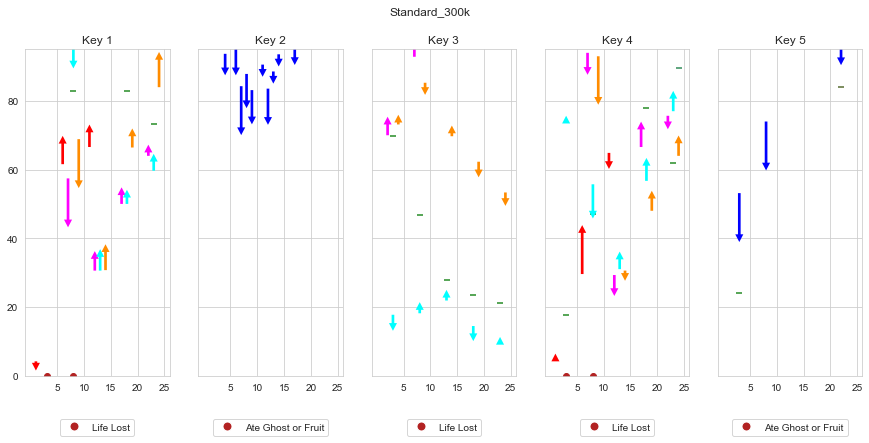

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

Standard_2M
KEY: 0.0
KEY: 1.0
70133      0.0
70134      0.0
70135      0.0
70136     10.0
70137      0.0
70138      0.0
70139     10.0
70140      0.0
70141      0.0
70142      0.0
70143     10.0
70144      0.0
70145      0.0
70146      0.0
70147     10.0
70148      0.0
70149      0.0
70150     10.0
70151      0.0
70152      0.0
70153     10.0
70154      0.0
70155      0.0
70156    400.0
70157      0.0
70158      0.0
70159      0.0
70160      0.0
70161     50.0
70162      0.0
70163      0.0
Name: reward, dtype: float64
Key is 31 steps long
reward: 2.857142857142857
reward: 1.4285714285714286
reward: 4.285714285714286
reward: 57.142857142857146
reward: 16.666666666666668
KEY: 2.0
72151     0.0
72152     0.0
72153     0.0
72154     0.0
72155     0.0
72156     0.0
72157     0.0
72158     0.0
72159     0.0
72160     0.0
72161     0.0
72162    10.0
72163     0.0
72164     0.0
72165    10.0
72166     0.0
72167     0.0
72168    10.0
72169     0.0
72170     0.0
72171     0.0
72172    10.0
72173

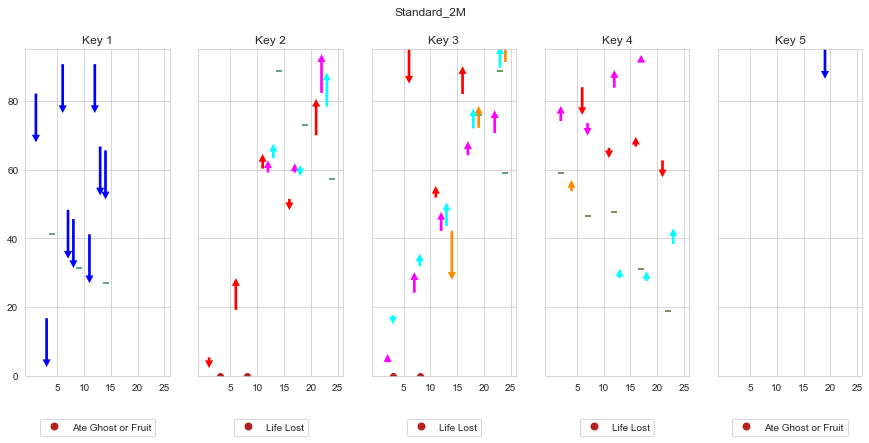

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

Standard_23_run1
KEY: 0.0
KEY: 1.0
82678     0.0
82679     0.0
82680     0.0
82681     0.0
82682     0.0
82683     0.0
82684     0.0
82685    10.0
82686     0.0
82687     0.0
82688     0.0
82689    10.0
82690     0.0
82691     0.0
82692    10.0
82693     0.0
82694     0.0
82695    10.0
82696     0.0
82697     0.0
82698     0.0
82699    10.0
82700     0.0
82701     0.0
82702    10.0
82703     0.0
82704     0.0
82705     0.0
82706    10.0
82707     0.0
82708     0.0
Name: reward, dtype: float64
Key is 31 steps long
reward:
2.857142857142857
reward:
2.857142857142857
reward:
2.857142857142857
reward:
3.3333333333333335
KEY: 2.0
82950     0.0
82951     0.0
82952    10.0
82953     0.0
82954     0.0
82955    10.0
82956     0.0
82957     0.0
82958    10.0
82959     0.0
82960     0.0
82961     0.0
82962    10.0
82963     0.0
82964     0.0
82965    10.0
82966     0.0
82967     0.0
82968     0.0
82969    10.0
82970     0.0
82971     0.0
82972    10.0
82973     0.0
82974     0.0
82975    10.0
829

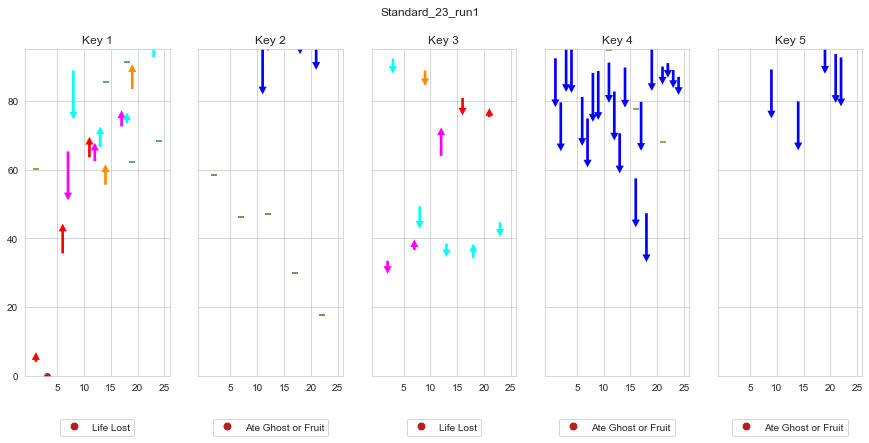

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

Standard_23_run2
KEY: 0.0
KEY: 1.0
92762     0.0
92763     0.0
92764     0.0
92765     0.0
92766     0.0
92767     0.0
92768     0.0
92769    10.0
92770     0.0
92771     0.0
92772     0.0
92773    10.0
92774     0.0
92775     0.0
92776    10.0
92777     0.0
92778     0.0
92779    10.0
92780     0.0
92781     0.0
92782     0.0
92783    10.0
92784     0.0
92785     0.0
92786    10.0
92787     0.0
92788     0.0
92789     0.0
92790    10.0
92791     0.0
92792     0.0
Name: reward, dtype: float64
Key is 31 steps long
reward:
2.857142857142857
reward:
2.857142857142857
reward:
2.857142857142857
reward:
3.3333333333333335
KEY: 2.0
93034     0.0
93035     0.0
93036    10.0
93037     0.0
93038     0.0
93039    10.0
93040     0.0
93041     0.0
93042    10.0
93043     0.0
93044     0.0
93045     0.0
93046    10.0
93047     0.0
93048     0.0
93049    10.0
93050     0.0
93051     0.0
93052     0.0
93053    10.0
93054     0.0
93055     0.0
93056    10.0
93057     0.0
93058     0.0
93059    10.0
930

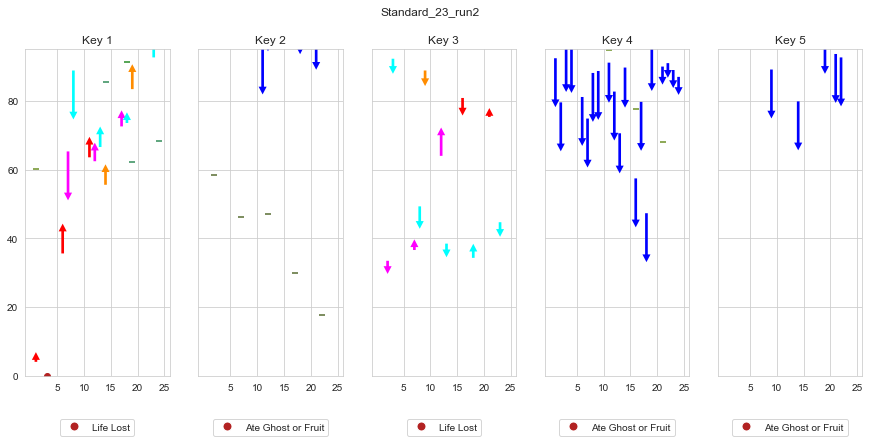

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

<Figure size 230.4x360 with 0 Axes>

In [6]:
import plotly.figure_factory as ff
import math
from matplotlib.lines import Line2D
import os

# Rewards are: 
#  Dot - 10
#  Energy Pill (Power Pill) - 50
#  Cherry - 100
#  Strawberry - 200 OR 1st Blue Ghost - 200
#  Orange - 500
#  Pretzel - 700
#  Apple - 1,000
#  Pear - 2,000
#  Banana - 5,000
#  1st Blue Ghost - 200
#  2nd Blue Ghost - 400
#  3rd Blue Ghost - 800
#  4th Blue Ghost - 1,600
sns.set_style("whitegrid")

# Just use key states as-is firs, see if it works
for agent_index, num in enumerate(basic_num_df.agentNum.unique()):
    # for each agent, make a figure
    fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(15,6),sharey=True)
    
    temp1 = basic_num_df[basic_num_df['agentNum']==num]
    print(agent_names[agent_index])
    for key_index, key in enumerate(temp1.keyNum.unique()):
        print("KEY: " + str(key))
        temp2 = temp1[temp1['keyNum']==key]
        if (key_index >= 1):
            print(temp2['reward'])
            # set up pill marker style 
            marke = '_'
            idx = key_index-1
            # Need to get length of key state DF
            limit = len(temp2)
            upper_bound = len(temp2)*4
            
            x_loc = range(1,upper_bound+1)[0::5]
            
            x_loc2 = range(1,upper_bound+2)[1::5]
            x_loc3 = range(1,upper_bound+3)[2::5]
            x_loc4 = range(1,upper_bound+4)[3::5]
            x_loc5 = range(1,upper_bound+4)[4::5]
            print("Key is " + str(limit) + " steps long")
            
            # Then divide into 5 chunks
            n = math.floor(limit / 4)
#             print("And n is " + str(n))
            list_df = [temp2[i:i+n] for i in range(0,temp2.shape[0],n)]
#             print([i.mean(axis=0)['to_red_ghost'] for i in list_df])
            
            # Then get average of each chunk
#             for index, i in enumerate(list_df):
#                 print(i.mean(axis=0)['to_red_ghost'])
                
            # Then turn each chunk into an arrow
            plt.figure(figsize=(3.2, 5))

            if (temp2["isDBG"].any() > 0):
#                 sns.set_style("darkgrid")

                axes[idx].set_ylim((0,95))
                axes[idx].xaxis.grid(True)
                axes[idx].set_xticks(x_loc5)
                for index, i in enumerate(list_df):
                    
                    if (i.mean(axis=0)['diff_to_dbg1'] < 12):
                        if (i.mean(axis=0)['diff_to_dbg1'] < -12):  
                            db1_dy = -12
                        else:
                            db1_dy = i.mean(axis=0)['diff_to_dbg1']
                    else:
                        db1_dy = 12
                        
                    if (i.mean(axis=0)['diff_to_dbg2'] < 12):
                        if (i.mean(axis=0)['diff_to_dbg2'] < -12):  
                            db2_dy = -12
                        else:
                            db2_dy = i.mean(axis=0)['diff_to_dbg2']
                    else:
                        db2_dy = 12
                        
                    if (i.mean(axis=0)['diff_to_dbg3'] < 12):
                        if (i.mean(axis=0)['diff_to_dbg3'] < -12):  
                            db3_dy = -12
                        else:
                            db3_dy = i.mean(axis=0)['diff_to_dbg3']
                    else:
                        db3_dy = 12
                        
                    if (i.mean(axis=0)['diff_to_dbg4'] < 12):
                        if (i.mean(axis=0)['diff_to_dbg4'] < -12):  
                            db4_dy = -12
                        else:
                            db4_dy = i.mean(axis=0)['diff_to_dbg4']
                    else:
                        db4_dy = 12
                        
                    print("reward: " + str(i.mean(axis=0)['reward']))
                    if i.mean(axis=0)['reward'] > 60:
                        col = 'firebrick'
                        al = 1
                    else:
                        col = 'gainsboro'
                        al = 0
                    axes[idx].arrow(x_loc[index],abs(i.mean(axis=0)['to_db1']),0,db1_dy, width=0.5, facecolor='blue', edgecolor='none')
                    axes[idx].arrow(x_loc2[index],abs(i.mean(axis=0)['to_db2']),0,db2_dy, width=0.5, facecolor='blue', edgecolor='none')
                    axes[idx].arrow(x_loc3[index],abs(i.mean(axis=0)['to_db3']),0,db3_dy, width=0.5, facecolor='blue', edgecolor='none')
                    axes[idx].arrow(x_loc4[index],abs(i.mean(axis=0)['to_db4']),0,db4_dy, width=0.5, facecolor='blue', edgecolor='none')
                    axes[idx].scatter(x_loc3[index],0,c=col, alpha=al)
                    
                    if (i.mean(axis=0)['pill_one_eaten'])==0:
                        axes[idx].scatter(x_loc[index],y=abs(i.mean(axis=0)['to_pill_one']), color='olivedrab', marker=marke)
                    if (i.mean(axis=0)['pill_two_eaten'])==0:
                        axes[idx].scatter(x_loc2[index],y=abs(i.mean(axis=0)['to_pill_two']), color='darkolivegreen', marker=marke)
                    if (i.mean(axis=0)['pill_three_eaten'])==0:
                        axes[idx].scatter(x_loc3[index],y=abs(i.mean(axis=0)['to_pill_three']), color='forestgreen', marker=marke)
                    if (i.mean(axis=0)['pill_four_eaten'])==0:
                        axes[idx].scatter(x_loc4[index],y=abs(i.mean(axis=0)['to_pill_four']), color='seagreen', marker=marke)
                    red_circle = Line2D([0], [0], marker='o', color='w', label='Ate Ghost or Fruit',
                        markerfacecolor='firebrick', markersize=9),
                    axes[idx].legend(handles=red_circle, loc="lower center", bbox_to_anchor=(0.5, -0.2))
                    axes[idx].set_title("Key " + str(key.astype(int)))
                
#                 plt.savefig("/Users/byrdsmyth/iCloud/Documents/School/Thesis/Stimuli/" + 
#                             agent_names[agent_index] + "ARROWSKey" + str(key_index) + ".png", bbox_inches='tight', \
#                            dpi=300)

#                 plt.show()

            else:
                
                axes[idx].set_ylim((0,95))
                axes[idx].xaxis.grid(True)
#                 axes[idx].grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.6)
                axes[idx].set_xticks(x_loc5)
                for index, i in enumerate(list_df):
                    if (i.mean(axis=0)['diff_to_red'] < 12):
                        if (i.mean(axis=0)['diff_to_red'] < -12):  
                            red_dy = -12
                        else:
                            red_dy = i.mean(axis=0)['diff_to_red']
                    else:
                        red_dy = 12
                        
                    if (i.mean(axis=0)['diff_to_pink'] < 12):
                        if (i.mean(axis=0)['diff_to_pink'] < -12):  
                            pink_dy = -12
                        else:
                            pink_dy = i.mean(axis=0)['diff_to_pink']
                    else:
                        pink_dy = 12
                        
                    if (i.mean(axis=0)['diff_to_blue'] < 12):
                        if (i.mean(axis=0)['diff_to_blue'] < -12):  
                            blue_dy = -12
                        else:
                            blue_dy = i.mean(axis=0)['diff_to_blue']
                    else:
                        blue_dy = 12
                        
                    if (i.mean(axis=0)['diff_to_orange'] < 12):
                        if (i.mean(axis=0)['diff_to_orange'] < -12):  
                            orange_dy = -12
                        else:
                            orange_dy = i.mean(axis=0)['diff_to_orange']
                    else:
                        orange_dy = 12
                    
#                     print("life lost: " + str(i.mean(axis=0)['beforeLifeLoss']))
                    if i.mean(axis=0)['beforeLifeLoss'] > 0:
                        col = 'firebrick'
                        al = 1
                    else:
                        print("reward:")
                        print(i.mean(axis=0)['reward'])
                        if i.mean(axis=0)['reward'] > 40 and i.mean(axis=0)['reward'] < 60:
                            col = 'lawngreen'
                            al = 1
                        else:
                            col = 'whitesmoke'
                            al = 0
                    
                    # Color-blind friendly pallette worked out here
                    axes[idx].arrow(x_loc[index],abs(i.mean(axis=0)['to_red_ghost']),0,red_dy, width=0.5, facecolor='red', edgecolor='none')
                    axes[idx].arrow(x_loc2[index],abs(i.mean(axis=0)['to_pink_ghost']),0,pink_dy, width=0.5, facecolor='magenta', edgecolor='none')
                    axes[idx].arrow(x_loc3[index],abs(i.mean(axis=0)['to_blue_ghost']),0,blue_dy, width=0.5, facecolor='aqua', edgecolor='none')
                    axes[idx].arrow(x_loc4[index],abs(i.mean(axis=0)['to_orange_ghost']),0,orange_dy, width=0.5, facecolor='darkorange', edgecolor='none')
                    axes[idx].scatter(x_loc3[index], 0, c=col, alpha=al)
                    
                    if (i.mean(axis=0)['pill_one_eaten'])==0:
                        axes[idx].scatter(x_loc[index],y=abs(i.mean(axis=0)['to_pill_one']), color='olivedrab', marker=marke)
                    if (i.mean(axis=0)['pill_two_eaten'])==0:
                        axes[idx].scatter(x_loc2[index],y=abs(i.mean(axis=0)['to_pill_two']), color='darkolivegreen', marker=marke)
                    if (i.mean(axis=0)['pill_three_eaten'])==0:
                        axes[idx].scatter(x_loc3[index],y=abs(i.mean(axis=0)['to_pill_three']), color='forestgreen', marker=marke)
                    if (i.mean(axis=0)['pill_four_eaten'])==0:
                        axes[idx].scatter(x_loc4[index],y=abs(i.mean(axis=0)['to_pill_four']), color='seagreen', marker=marke)
                    red_circle = Line2D([0], [0], marker='o', color='w', label='Life Lost',
                        markerfacecolor='firebrick', markersize=9),
                    axes[idx].legend(handles=red_circle, loc="lower center", bbox_to_anchor=(0.5, -0.2))

                    axes[idx].set_title("Key " + str(key.astype(int)))
    fig.suptitle(agent_names[agent_index])       
    pathname = "/Users/byrdsmyth/iCloud/Documents/School/Thesis/Stimuli/" 
    if not os.path.exists(pathname):
        os.mkdir(pathname)
    filename = pathname + agent_names[agent_index] + "ARROWSKey" + ".png"
    if not os.path.exists(filename):
        with open(filename, 'w') as fp:
            pass
    print("SAVING " + str(filename))
    fig.savefig(filename, bbox_inches='tight',dpi=300)
    plt.show()

In [ ]:
import math 

# Rewards are: 
#  Dot - 10
#  Energy Pill (Power Pill) - 50
#  Cherry - 100
#  Strawberry - 200 OR 1st Blue Ghost - 200
#  Orange - 500
#  Pretzel - 700
#  Apple - 1,000
#  Pear - 2,000
#  Banana - 5,000
#  1st Blue Ghost - 200
#  2nd Blue Ghost - 400
#  3rd Blue Ghost - 800
#  4th Blue Ghost - 1,600



# Just use key states as-is firs, see if it works
for agent_index, num in enumerate(basic_num_df.agentNum.unique()):
    temp1 = basic_num_df[basic_num_df['agentNum']==num]
    print("\n\n.....................................................AGENT: " + str(agent_names[agent_index]))
    
    for key_index, key in enumerate(temp1.keyNum.unique()):
        temp2 = temp1[temp1['keyNum']==key]
        if (key_index >= 1):
            print("\n............................................KEY " + str(key_index))
            
            # set up pill flags
            p1 = False
            p2 = False
            p3 = False
            p4 = False
            
            # Need to get length of key state DF
            limit = len(temp2)
            upper_bound = len(temp2)*4
            
            x_loc = range(1,upper_bound+1)[0::5]
            
            x_loc2 = range(1,upper_bound+2)[1::5]
            x_loc3 = range(1,upper_bound+3)[2::5]
            x_loc4 = range(1,upper_bound+4)[3::5]
            x_loc5 = range(1,upper_bound+4)[4::5]
            print("Key is " + str(limit) + " steps long")
            
            # Then divide into 5 chunks
            n = math.floor(limit / 4)
            print("And n is " + str(n))
            list_df = [temp2[i:i+n] for i in range(0,temp2.shape[0],n)]
#             print([i.mean(axis=0)['to_red_ghost'] for i in list_df])
            
            # Then get average of each chunk
            for index, i in enumerate(list_df):
                print("\n....................................INDEX: " + str(index))
                print(i['reward'])
                if (400 in i['reward'].unique()):
                    print("GHOST????")
                if (i.mean(axis=0)['reward']>8.5):
                    print("................reward: " + str(i.mean(axis=0)['reward']))
                if (abs(i.mean(axis=0)['pill_one_eaten'])>0):
                    if(p1 == False):
                        p1 = True
                        if (index > 0 and i.mean(axis=0)['reward']>8.5):
                            print("\npill one eaten")
                            print("reward: " + str(i.mean(axis=0)['reward']))
                            if (i.mean(axis=0)['isDBG']>0):
                                print("~~~~~~~~~~~~~DBG~~~~~~~~~~~~~")
                                print("To dbg1")
                                print(i.mean(axis=0)['to_db1'])
                                print("To dbg2")
                                print(i.mean(axis=0)['to_db2'])
                                print("To dbg3")
                                print(i.mean(axis=0)['to_db3'])
                                print("To dbg4")
                                print(i.mean(axis=0)['to_db4'])
                    
                if (abs(i.mean(axis=0)['pill_two_eaten'])>0):
                    if(p2 == False):
                        p2 = True
                        if (index > 0 and i.mean(axis=0)['reward']>8.5):
                            print("\npill two eaten")
                            print("reward: " + str(i.mean(axis=0)['reward']))
                            if (i.mean(axis=0)['isDBG']>0):
                                print("~~~~~~~~~~~~~DBG~~~~~~~~~~~~~")
                                print("To dbg1")
                                print(i.mean(axis=0)['to_db1'])
                                print("To dbg2")
                                print(i.mean(axis=0)['to_db2'])
                                print("To dbg3")
                                print(i.mean(axis=0)['to_db3'])
                                print("To dbg4")
                                print(i.mean(axis=0)['to_db4'])
                    
                if (abs(i.mean(axis=0 and i.mean(axis=0)['reward']>8.5)['pill_three_eaten'])>0):
                    if(p3 == False):
                        p3 = True
                        if (index > 0):
                            print("\npill three eaten")
                            print("reward: " + str(i.mean(axis=0)['reward']))
                            if (i.mean(axis=0)['isDBG']>0):
                                print("~~~~~~~~~~~~~DBG~~~~~~~~~~~~~")
                                print("To dbg1")
                                print(i.mean(axis=0)['to_db1'])
                                print("To dbg2")
                                print(i.mean(axis=0)['to_db2'])
                                print("To dbg3")
                                print(i.mean(axis=0)['to_db3'])
                                print("To dbg4")
                                print(i.mean(axis=0)['to_db4'])
                    
                if (abs(i.mean(axis=0)['pill_four_eaten'])>0):
                    if(p4 == False):
                        p4 = True
                        if (index > 0 and i.mean(axis=0)['reward']>8.5):
                            print("\npill four eaten")
                            print("reward: " + str(i.mean(axis=0)['reward']))
                            if (i.mean(axis=0)['isDBG']>0):
                                print("~~~~~~~~~~~~~DBG~~~~~~~~~~~~~")
                                print("To dbg1")
                                print(i.mean(axis=0)['to_db1'])
                                print("To dbg2")
                                print(i.mean(axis=0)['to_db2'])
                                print("To dbg3")
                                print(i.mean(axis=0)['to_db3'])
                                print("To dbg4")
                                print(i.mean(axis=0)['to_db4'])
